In [46]:
import numpy as np

In [47]:
import pandas as pd

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv('dataset.csv')

In [50]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])

In [51]:
df = pd.get_dummies(df, columns=['Product_Category','Customer_Segment'], drop_first=True)


In [52]:
X = df.drop(columns=['Units_Sold'])
y = df['Units_Sold']

In [53]:
X

,Price,Discount,Marketing_Spend,Month,DayOfWeek,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys,Customer_Segment_Premium,Customer_Segment_Regular
0,932.80,35.82,6780.38,1,6,False,False,True,False,False,False
1,569.48,3.60,6807.56,1,0,False,False,False,True,True,False
2,699.68,3.56,3793.91,1,1,False,True,False,False,True,False
3,923.27,0.61,9422.75,1,2,False,False,False,True,True,False
4,710.17,47.83,1756.83,1,3,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,740.06,49.06,1890.83,9,0,True,False,False,False,False,True
996,517.10,28.48,8011.66,9,1,False,False,False,False,True,False
997,683.43,12.98,3408.51,9,2,False,False,False,False,False,False
998,51.26,21.85,7335.62,9,3,False,False,True,False,False,False


In [54]:
y

0      32
1      16
2      27
3      29
4      17
       ..
995    34
996    21
997    19
998    26
999    39
Name: Units_Sold, Length: 1000, dtype: int64

In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [56]:
class MyLinearRegression:
    def __init__(self, iterations=10000, alpha = 0.01, normalize = True):
        #initializing values
        self.normalize = normalize
        self.iterations = iterations
        self.alpha = alpha
        self.mean_ = None
        self.std_ = None
        self.w = None
        self.b = 0
        
    def standardize(self, X):
        X = np.array(X, dtype=float)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_[self.std_ == 0] = 1
        return (X - self.mean_) / self.std_

        #basic feature scaling without using sklearn
        
    def transform(self, X):
        X = np.array(X, dtype=float)
        return (X - self.mean_) / self.std_

        #transfroming
        
    def fit(self, X,y):
        if self.normalize == True:
            X = self.standardize(X)
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.iterations):
            ypred = X.dot(self.w) + self.b
            diff = ypred - y
            dw = (1/n) * X.T.dot(diff)
            db = (1/n) * diff.sum()
            self.w = self.w- self.alpha*dw
            self.b = self.b - self.alpha*db
            
            #fitting
            
    def predict(self, X):
        if self.normalize:
            X = self.transform(X)
        return X.dot(self.w) + self.b
        #predicting w and b
    

In [57]:
MyModel = MyLinearRegression()
MyModel.fit(X_train.values, y_train.values)

y_train_pred = MyModel.predict(X_train.values)
y_val_pred   = MyModel.predict(X_val.values)
y_test_pred  = MyModel.predict(X_test.values)

In [58]:
PyModel = LinearRegression()
PyModel.fit(X_train, y_train)

y_train_pypred = PyModel.predict(X_train)
y_val_pypred   = PyModel.predict(X_val)
y_test_pypred  = PyModel.predict(X_test)


In [59]:
y_test_pypred

array([27.61246163, 28.48380246, 30.19015822, 29.35077884, 29.83249979,
       32.32716182, 28.76996066, 30.01223401, 29.56295938, 28.77931984,
       29.99981169, 29.96312559, 33.02920669, 29.49013269, 29.27371282,
       32.35033312, 28.49384204, 28.73114705, 29.53667109, 29.32940548,
       30.60532895, 30.86208451, 28.74206135, 29.00583397, 29.94515192,
       28.26954709, 28.33564693, 31.13422166, 31.82983913, 28.32947383,
       27.54133608, 30.32277683, 31.05718571, 29.70987458, 29.54616755,
       33.03187911, 28.75873097, 31.47645885, 30.42563059, 30.4261354 ,
       29.26223955, 30.41620055, 32.87968888, 31.49791238, 31.66990683,
       29.73670301, 30.5606343 , 30.92014837, 29.01843245, 33.01866516,
       28.77766427, 31.39627426, 28.83257778, 31.05124697, 29.00725081,
       31.42240098, 28.49403032, 27.99896082, 31.18428404, 32.30038186,
       28.42678627, 30.84992644, 29.55160409, 29.61986433, 32.97686451,
       27.98964786, 28.950982  , 29.14602179, 29.92205598, 29.43

In [60]:
y_test_pred

array([27.61246163, 28.48380246, 30.19015822, 29.35077884, 29.83249979,
       32.32716182, 28.76996066, 30.01223401, 29.56295938, 28.77931984,
       29.99981169, 29.96312559, 33.02920669, 29.49013269, 29.27371282,
       32.35033312, 28.49384204, 28.73114705, 29.53667109, 29.32940548,
       30.60532895, 30.86208451, 28.74206135, 29.00583397, 29.94515192,
       28.26954709, 28.33564693, 31.13422166, 31.82983913, 28.32947383,
       27.54133608, 30.32277683, 31.05718571, 29.70987458, 29.54616755,
       33.03187911, 28.75873097, 31.47645885, 30.42563059, 30.4261354 ,
       29.26223955, 30.41620055, 32.87968888, 31.49791238, 31.66990683,
       29.73670301, 30.5606343 , 30.92014837, 29.01843245, 33.01866516,
       28.77766427, 31.39627426, 28.83257778, 31.05124697, 29.00725081,
       31.42240098, 28.49403032, 27.99896082, 31.18428404, 32.30038186,
       28.42678627, 30.84992644, 29.55160409, 29.61986433, 32.97686451,
       27.98964786, 28.950982  , 29.14602179, 29.92205598, 29.43

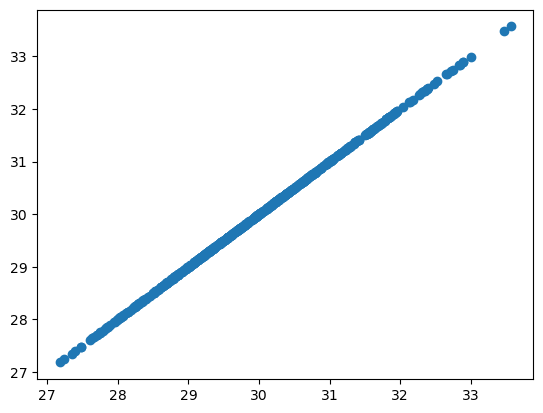

In [64]:
plt.scatter(y_train_pred, y_train_pypred)
plt.show()